In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns 
import matplotlib.pyplot as plt  
import warnings    
import pycountry
import geopandas
#import awoc
warnings.filterwarnings("ignore") 
#import pycountry_convert as pc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
tdf = df.copy()
tdf 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


 I rename  'gdp_for_year' column, and replace commas to make int type for calculations.

In [3]:

tdf.rename(columns = {' gdp_for_year ($) ':'gdp_for_year'}, inplace = True)
tdf.rename(columns = {'gdp_per_capita ($)':'gdp_per_capita'}, inplace = True)
tdf["gdp_for_year"] = tdf["gdp_for_year"].apply(lambda x: int(x.replace(',','')))
tdf

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [4]:
tdf.isnull().sum(axis = 0)

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [5]:
tdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [6]:
tdf['gdp_for_year'] = tdf['gdp_for_year'].astype(str).astype(int)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [7]:
tdf.shape

(27820, 12)

In [8]:
tdf.country.nunique()

101

In [9]:
tdf.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# . Global Suicides(per 100K)-trend over time 1985-2016

In [10]:
pd.pivot_table(tdf, values=["suicides/100k pop"], index=["year"], aggfunc={'suicides/100k pop':[np.mean]})

,suicides/100k pop
,mean
year,
1985,11.826198
1986,11.423333
1987,11.644213
1988,12.709405
1989,12.879071
1990,12.862956
1991,13.438880
1992,13.498564


In [11]:
tdf_year = df.groupby(["year"])["suicides/100k pop"].mean()
tdf_population= df.groupby(["year"])["suicides/100k pop"].mean()
tdf_year

year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
2012    11.421718
2013    11.107958
2014    11.011464
2015    11.094073
2016    13.421188
Name: suicides/100k pop, dtype: float64

In [99]:
tdf_ages = tdf.groupby(["year"])["suicides_no"].sum()
tdf_pop= tdf.groupby(["year"])["population"].sum()
tdf_avg= (tdf_ages/tdf_pop)*100000
tdf_avg

year
1985    11.507336
1986    11.716562
1987    11.583430
1988    11.481514
1989    13.075653
1990    13.184123
1991    13.290036
1992    13.473570
1993    14.477430
1994    14.983896
1995    15.302228
1996    14.842676
1997    14.136594
1998    14.467522
1999    14.418167
2000    14.218988
2001    14.277565
2002    14.054529
2003    13.929010
2004    13.800972
2005    13.509349
2006    12.676402
2007    12.551757
2008    12.654217
2009    12.320793
2010    11.951250
2011    11.863573
2012    12.032546
2013    11.808461
2014    11.661994
2015    11.474887
2016    11.811337
dtype: float64

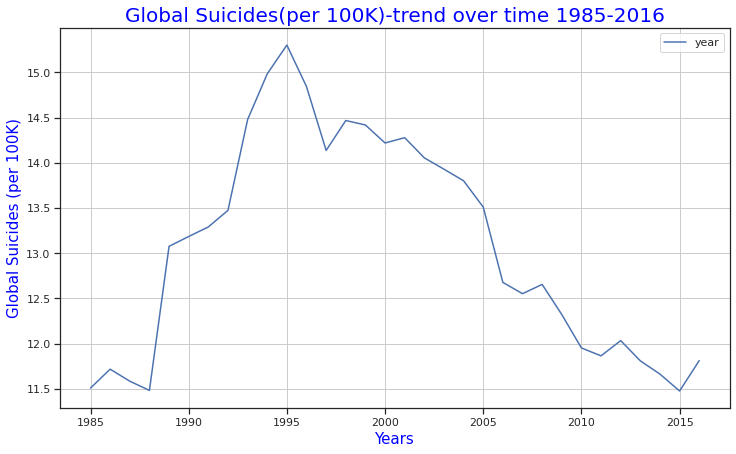

In [103]:
plt.figure(figsize=(12,7))       
sns.lineplot(data=tdf_avg,  label="year")
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Global Suicides (per 100K)',fontsize = 15,color='blue')
plt.title('Global Suicides(per 100K)-trend over time 1985-2016',fontsize = 20,color='blue')
plt.grid()
plt.show()

# Global Suicides(per 100k) by gender and trend over time 1985-2016

In [15]:
tdf_sex = tdf.groupby(["year", "sex"])["suicides_no"].sum()
tdf_sex_pop= tdf.groupby(["year", "sex"])["population"].sum()
tdf_sex_avg= (tdf_sex/tdf_sex_pop)*100000
tdf_sex_avg=tdf_sex_avg.unstack()
tdf_sex_avg

sex,female,male
year,,
1985,6.331028,16.865655
1986,6.454567,17.176590
1987,6.260196,17.138508
1988,6.127736,17.079080
1989,6.569136,19.950556
1990,6.648162,20.097014
1991,6.479691,20.491858
1992,6.401607,20.929905
1993,6.535707,22.849484


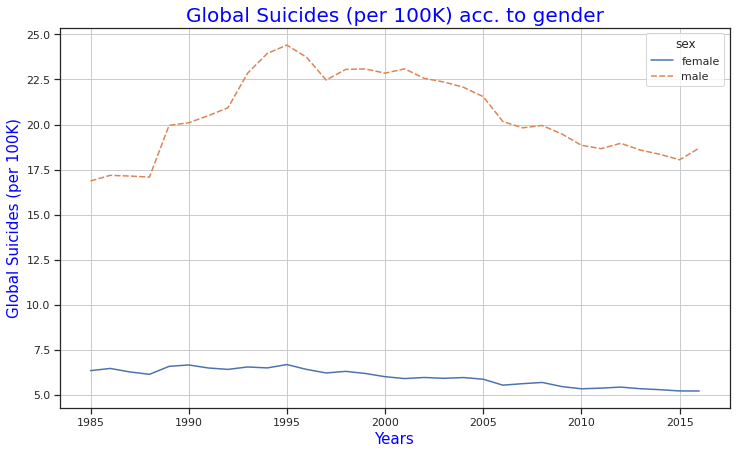

In [85]:
plt.figure(figsize=(12,7))
sns.lineplot(data=tdf_sex_avg)
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Global Suicides (per 100K)',fontsize = 15,color='blue')
plt.title('Global Suicides (per 100K) acc. to gender',fontsize = 20,color='blue')
plt.grid()
plt.show()

# Which age of people suicide a most

In [108]:
tdf_age = tdf.groupby(["year", "age"])["suicides_no"].sum()
tdf_age_pop= tdf.groupby(["year", "age"])["population"].sum()
tdf_age_avg= (tdf_age/tdf_age_pop)*100000
tdf_age_avg=tdf_age_avg.unstack()
tdfage1=tdf_age.unstack()
tdfage1

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,17870.0,20771.0,35748.0,984.0,28736.0,11954.0
1986,18063.0,21685.0,37558.0,944.0,29760.0,12660.0
1987,16432.0,22309.0,40649.0,935.0,32469.0,14048.0
1988,15337.0,21332.0,38770.0,837.0,30538.0,14212.0
1989,18636.0,29427.0,53541.0,1150.0,40087.0,17403.0
1990,23248.0,35276.0,65242.0,1477.0,47018.0,21100.0
1991,23317.0,35615.0,68374.0,1533.0,48315.0,20866.0
1992,24727.0,37758.0,75051.0,1687.0,51506.0,20744.0
1993,25262.0,39044.0,80670.0,1789.0,54278.0,20522.0


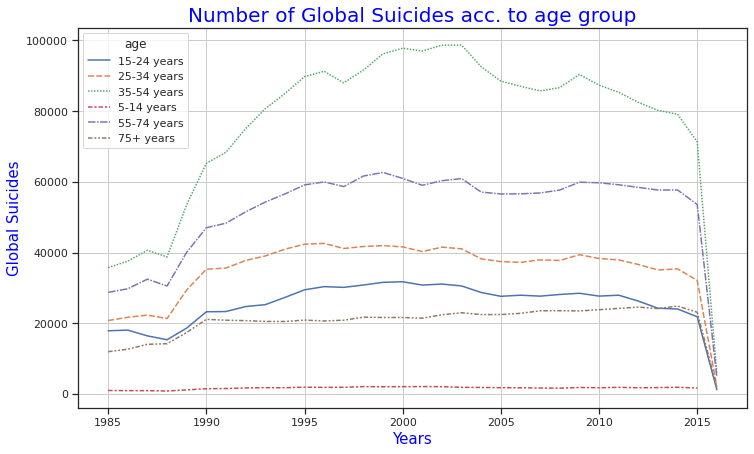

In [110]:
plt.figure(figsize=(12,7))
sns.lineplot(data=tdfage1)
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Global Suicides',fontsize = 15,color='blue')
plt.title('Number of Global Suicides acc. to age group',fontsize = 20,color='blue')
plt.grid()
plt.show()

 # Which generation of people suicide a most

In [113]:
tdf_gen = tdf.groupby(["year", "generation"])["suicides_no"].sum()
tdf_gen_pop= tdf.groupby(["year", "generation"])["population"].sum()
tdf_gen_avg= (tdf_gen/tdf_gen_pop)*100000
tdf_gen_avg=tdf_gen_avg.unstack()
tdf_gen1=tdf_gen.unstack()
tdf_gen1

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
1985,20771.0,40690.0,18854.0,NaN,NaN,35748.0
1986,21685.0,42420.0,19007.0,NaN,NaN,37558.0
1987,22309.0,46517.0,17367.0,NaN,NaN,40649.0
1988,21332.0,44750.0,16174.0,NaN,NaN,38770.0
1989,29427.0,57490.0,19786.0,NaN,NaN,53541.0
1990,35276.0,68118.0,24725.0,NaN,NaN,65242.0
1991,103989.0,20866.0,23317.0,NaN,1533.0,48315.0
1992,112809.0,20744.0,24727.0,NaN,1687.0,51506.0
1993,119714.0,20522.0,25262.0,NaN,1789.0,54278.0


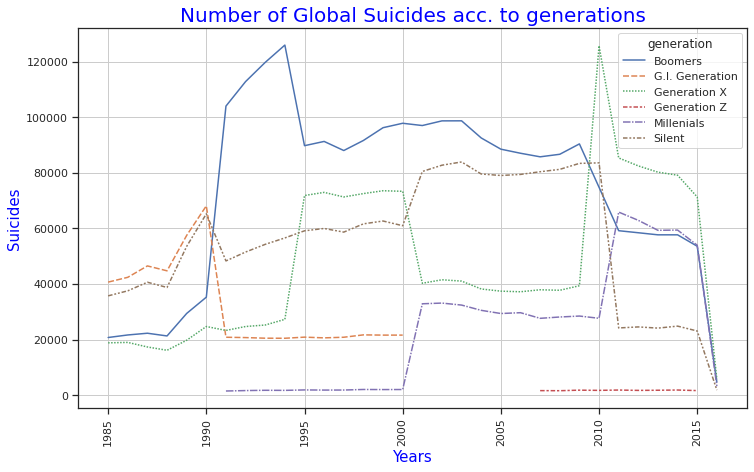

In [117]:

plt.figure(figsize=(12,7))
sns.lineplot(data=tdf_gen1)
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Suicides',fontsize = 15,color='blue')
plt.title('Number of Global Suicides acc. to generations',fontsize = 20,color='blue')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# Global Suicides(per 100K) by Continent

In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world2= world[["continent", "name"]]
world2.rename(columns = {'name':'country'}, inplace = True)
world2



,continent,country
0,Oceania,Fiji
1,Africa,Tanzania
2,Africa,W. Sahara
3,North America,Canada
4,North America,United States of America
...,...,...
172,Europe,Serbia
173,Europe,Montenegro
174,Europe,Kosovo
175,North America,Trinidad and Tobago


I corrected some major countries names on geopandas data in order to match the counterparts on my suicide data.

In [22]:
world2["country"].replace(["United States of America"], "United States", inplace=True)
world2["country"].replace(["Russia"], "Russian Federation", inplace=True)
world2["country"].replace(["South Korea"], "Republic of Korea", inplace=True)
world2["country"].replace(["Bosnia and Herz."], "Bosnia and Herzegovina", inplace=True)
world2["country"].replace(["Czechia"], "Czech Republic", inplace=True)
world2


,continent,country
0,Oceania,Fiji
1,Africa,Tanzania
2,Africa,W. Sahara
3,North America,Canada
4,North America,United States
...,...,...
172,Europe,Serbia
173,Europe,Montenegro
174,Europe,Kosovo
175,North America,Trinidad and Tobago


In [23]:
#tdf3=merge(tdf, world2, by='country')
tdf_cont=tdf.merge(world2,on='country')
tdf_cont[["country", "continent"]]
#tdf_cont=tdf_cont.groupby("country")["continent"]
tdf_cont

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24123,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,Asia
24124,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,Asia
24125,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,Asia
24126,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,Asia


In [118]:
#tdf_cont.sort_values(by=['country'])
tdf_cont1=tdf_cont.sort_values(['country','continent'],ascending=True).groupby('country').head(1)
tdf_cont2=tdf_cont1[["country", "continent"]]
tdf_cont2

,country,continent
0,Albania,Europe
264,Argentina,South America
636,Armenia,Asia
934,Australia,Oceania
1294,Austria,Europe
...,...,...
22712,United Arab Emirates,Asia
22784,United Kingdom,Europe
23156,United States,North America
23528,Uruguay,South America


In [119]:
tdf_cont1 = tdf_cont.groupby(["year", "continent"])["suicides_no"].sum()
tdf_cont_pop= tdf_cont.groupby(["year", "continent"])["population"].sum()
tdf_cont_avg= (tdf_cont1/tdf_cont_pop)*100000
tdf_cont_avg=tdf_cont_avg.unstack()
tdf_cont_avg


continent,Africa,Asia,Europe,North America,Oceania,South America
year,,,,,,
1985,NaN,16.680173,13.357687,10.780006,12.502630,4.494151
1986,NaN,17.146247,13.243845,11.139571,13.781194,4.527362
1987,NaN,14.603528,14.487221,11.021288,14.518946,4.581886
1988,NaN,16.304953,14.111021,10.751450,14.460481,4.491352
1989,NaN,15.215093,17.970000,10.600188,13.582407,4.326314
1990,NaN,12.531556,17.966691,10.778565,14.060879,4.364318
1991,NaN,12.153601,18.413765,10.634168,14.373439,4.376915
1992,NaN,10.592865,19.569980,10.878508,14.115880,4.457877
1993,NaN,11.802965,21.228175,10.973946,12.630325,4.708773


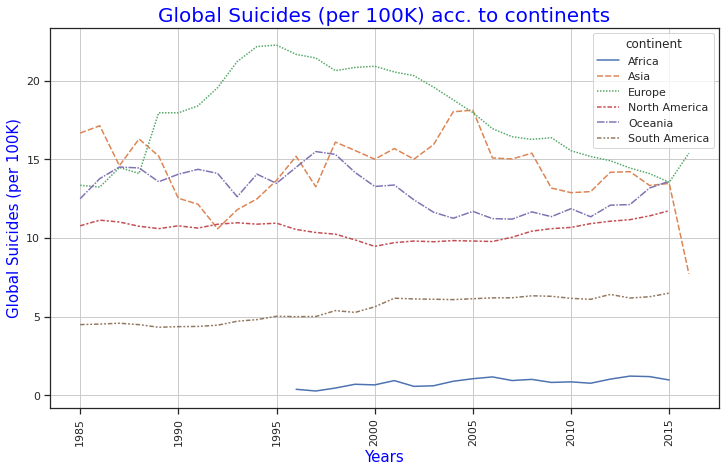

In [120]:
plt.figure(figsize=(12,7))
sns.lineplot(data=tdf_cont_avg)
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Global Suicides (per 100K)',fontsize = 15,color='blue')
plt.title('Global Suicides (per 100K) acc. to continents',fontsize = 20,color='blue')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Europe has the highest suicide ratio per 100k, Africa has the lowest ratio

In [27]:
tdf_cou=tdf.country.unique()
tdf_cou


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

data setimdeki ulkeler

In [28]:
set(tdf['country']).difference(set(tdf_cont2['country']))

{'Antigua and Barbuda',
 'Aruba',
 'Bahrain',
 'Barbados',
 'Cabo Verde',
 'Dominica',
 'Grenada',
 'Kiribati',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'San Marino',
 'Seychelles',
 'Singapore'}

data setimde yer almayan ulkeler

# Correlation between GDP(per Capita) and suicides per 100k

In [69]:
tdf_gdp = tdf.groupby(["year", "country", "gdp_per_capita"])["suicides_no"].sum()
tdf_gdp_pop= tdf.groupby(["year", "country", "gdp_per_capita"])["population"].sum()
tdf_gdp_avg= ((tdf_gdp/tdf_gdp_pop)*100000)
tdf_gdp_avg





year  country              gdp_per_capita
1985  Antigua and Barbuda  3850               0.000000
      Argentina            3264               7.338285
      Australia            12374             12.779399
      Austria              9759              29.408807
      Bahamas              11393              0.490918
                                               ...    
2016  Netherlands          48108             13.244797
      Qatar                62484              3.072584
      Romania              10020             11.733320
      Sweden               55594             13.906234
      Thailand             6713               7.703679
Length: 2321, dtype: float64

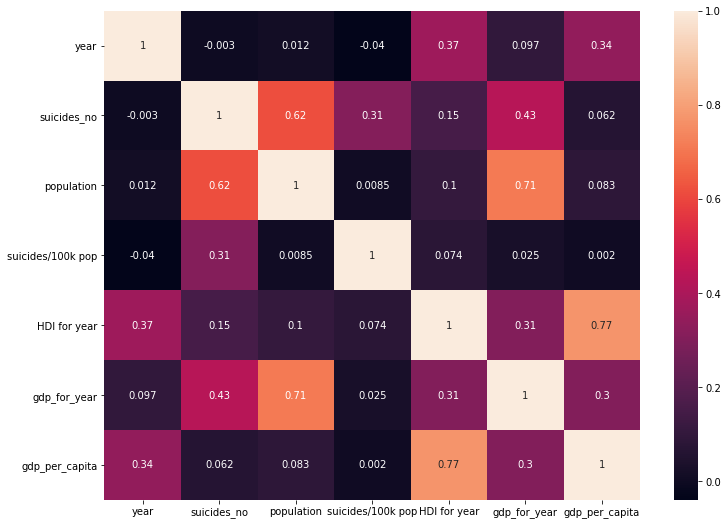

In [72]:

plt.subplots(figsize=(12,9))
sns.heatmap(tdf[tdf.year!=2016].corr(), annot = True);

# Population-gdp_per_capita Plot

In [77]:
x=tdf.groupby('year').gdp_for_year.sum()
x

year
1985    110964754234500
1986    132609631982868
1987    155769882274200
1988    175557691204476
1989    191618261647176
1990    236464399957008
1991    252102888610440
1992    268107812488032
1993    271037019424788
1994    293729643723660
1995    329358922744728
1996    335249321862228
1997    330610567459320
1998    330186954612684
1999    343808646118668
2000    352373683311288
2001    348137752649964
2002    361460007211452
2003    405293412848580
2004    450425300789256
2005    475067354100216
2006    517865365084944
2007    576509655876756
2008    619322403842760
2009    584833269596760
2010    625862405486292
2011    678000047330112
2012    676502580180480
2013    685050211812900
2014    672496725417372
2015    580433884300596
2016     29252100111210
Name: gdp_for_year, dtype: int64

In [78]:
y = tdf.groupby('year').population.sum()
y



year
1985    1008600086
1986    1029909613
1987    1095029726
1988    1054094424
1989    1225514347
1990    1466620100
1991    1489988384
1992    1569539447
1993    1530416654
1994    1548749372
1995    1591559103
1996    1662267662
1997    1702991519
1998    1725181351
1999    1776363155
2000    1799227908
2001    1755565489
2002    1822152815
2003    1838458020
2004    1745246613
2005    1734909645
2006    1840908837
2007    1859564353
2008    1860620851
2009    1976228366
2010    1997297329
2011    1993362332
2012    1912812088
2013    1890161710
2014    1912057309
2015    1774657932
2016     132101896
Name: population, dtype: int64

In [79]:
a= x/y
a

year
1985    110018.584942
1986    128758.514640
1987    142251.738538
1988    166548.353930
1989    156357.420145
1990    161230.846323
1991    169197.888599
1992    170819.416486
1993    177100.150287
1994    189656.021196
1995    206941.056806
1996    201681.912923
1997    194135.181397
1998    191392.606013
1999    193546.373190
2000    195847.164078
2001    198305.192732
2002    198369.754850
2003    220452.905881
2004    258086.907280
2005    273828.297323
2006    281309.619834
2007    310024.041355
2008    332857.929389
2009    295934.052794
2010    313354.650006
2011    340128.854873
2012    353669.126426
2013    362429.419763
2014    351713.686746
2015    327068.035949
2016    221435.883942
dtype: float64

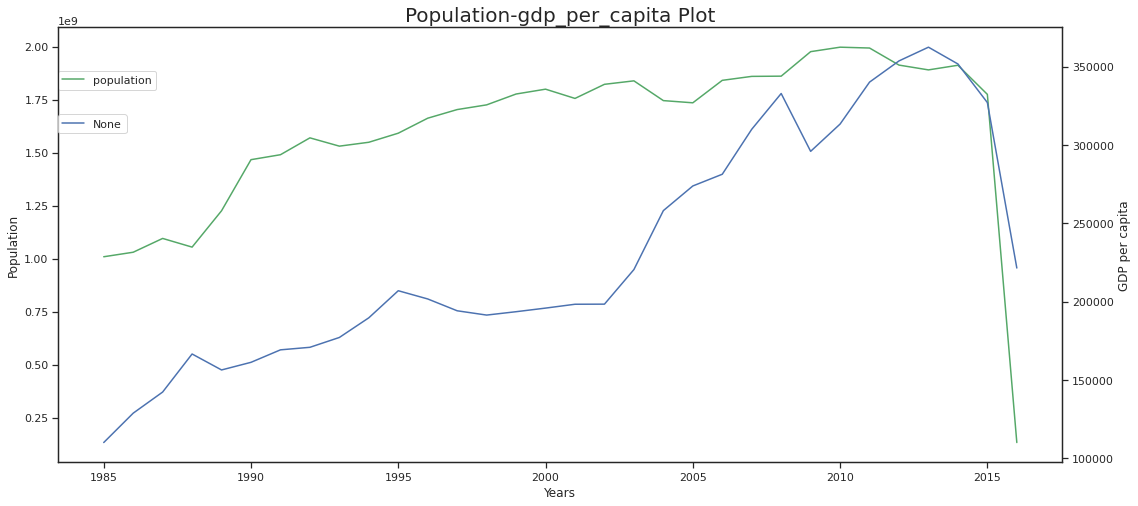

In [81]:


fig, ax = plt.subplots(figsize=(18,8))
y.plot(ax=ax,color='g',xlabel= "Years",ylabel= "Population")
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
a.plot(ax=ax2,color='b',ylabel='GDP per capita')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)

plt.title('Population-gdp_per_capita Plot', fontsize=20)
plt.show()
